# 4장

### 오차제곱합

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예 1 : 2일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 예 2 : 7일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

### 교차 엔트로피 오차

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7 
    # 아주 작은 델타값을 더하여 0이 되지 않게끔 설정
    # np.log() 함수에 0을 입력하면 (-) 무한대가 되기 때문
    return -np.sum(t * np.log(y + delta))

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예 1 : 2일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
# 예 2 : 7일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 미니배치 학습

In [9]:
# 데이터 불러오기
import sys, os
import numpy as np
from dataset.mnist import load_mnist

# one_hot_encoding으로 받기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### (배치용) 교차 엔트로피 오차 구현하기

In [11]:
# 정답 레이블이 one_hot_encoding으로 주어졌을 때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
# 정답 레이블이 숫자 그대로(2, 7 등) 주어졌을 때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 4장

### 미분

In [13]:
import numpy as np

In [14]:
# 나쁜 구현 예
def numerical_dfii(f, x):
    h = 1e-50 # 0에 가깝게 만들기 위해 h값을 사용, 하지만 반올림 오차 문제를 발생시킴
    return (f(x+h) - f(x)) / h

In [15]:
np.float32(1e-50)

0.0

In [16]:
# 개선된 코드
def numerical_diff(f, x):
    h = 1e-4 # 0.0001, 이정도의 값을 사용하면 좋은 값을 얻는다고 알려짐
    return (f(x+h) - f(x-h)) / (2*h)

### 수치 미분의 예

In [17]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1*x

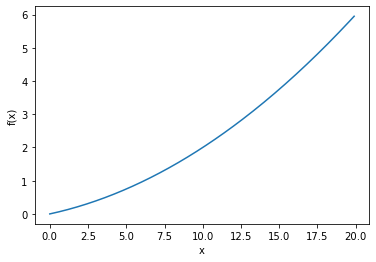

In [18]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [19]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 편미분

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [21]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 기울기

In [23]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h 
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

In [24]:
print(numerical_gradient(function_2, np.array([3.0, 4.0]))) # [6. 8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0]))) # [0. 4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0]))) # [6. 0.]

[6. 8.]
[0. 4.]
[6. 0.]


### 경사하강법

In [25]:
# f: 최적화 하려는 함수 
#init_x : 초기값
#lr : 학습률
#step_num : 반복횟수
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

### 문제 : 경사법으로 x0^2 + x1^2 의 최소값을 구하라

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr= 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [27]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [28]:
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

### 신경망에서의 기울기

In [31]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [42]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [46]:
net = simpleNet()
print(net.W) # 가중치 매개변수 설정, (2, 3)

[[-0.71622394 -2.01676632 -1.15556677]
 [-1.59736834  0.92485839  0.36830074]]


In [47]:
x = np.array([0.6, 0.9]) # (1, 2)
p = net.predict(x) # np.dot(x, self.W)
print(p) # (1,3)

[-1.86736587 -0.37768725 -0.3618694 ]


In [48]:
np.argmax(p) # 최댓값의 인덱스 찾기

2

In [49]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

0.7912775633241896

In [50]:
# f = lambda w: net.loss(x, t) => lambda 문법으로 이렇게도 표기 가능
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.06034965  0.26769113 -0.32804078]
 [ 0.09052448  0.40153669 -0.49206117]]


### 2층 신경망 클래스 구현하기

In [88]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [102]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [103]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (784, 100)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [104]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [98]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape    # (784, 100)
grads['b1'].shape    # (100,)
grads['W2'].shape    # (100, 10)
grads['b2'].shape    # (10)

(10,)

### 미니배치 학습 구현하기

In [108]:
import sys, os
sys.path.append(os.pardir)

In [110]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [113]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼 파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 시행
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 시험 데이터로 평가하기

In [123]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼 파라미터
iters_num =10000 # 반복횟수 적절히 설정
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 설정
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 에폭당 정확도 계산
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : " + str(train_acc) + ", " + str(test_acc))

train acc, test acc : 0.09035, 0.0892
train acc, test acc : 0.79565, 0.8009
train acc, test acc : 0.8769, 0.8827
train acc, test acc : 0.8988, 0.9016
train acc, test acc : 0.9082166666666667, 0.9125
train acc, test acc : 0.9149, 0.9163
train acc, test acc : 0.9200666666666667, 0.921
train acc, test acc : 0.9237666666666666, 0.9249
train acc, test acc : 0.92795, 0.9301
train acc, test acc : 0.9307166666666666, 0.9329
train acc, test acc : 0.9344833333333333, 0.936
train acc, test acc : 0.9372333333333334, 0.9366
train acc, test acc : 0.9390333333333334, 0.9381
train acc, test acc : 0.94175, 0.94
train acc, test acc : 0.9434833333333333, 0.9419
train acc, test acc : 0.9449333333333333, 0.9437
train acc, test acc : 0.9472833333333334, 0.9438
